<a href="https://colab.research.google.com/github/oscarwoodi/Oscar_Wooding_Google_PythonProject/blob/main/SimpleMAstrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description: This program uses the dual moving average crossover to determine when to buy and sell stock

In [514]:
#Import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('fivethirtyeight')

In [737]:
#Load the data
from google.colab import files
uploaded = files.upload()


Saving VUSA.L.csv to VUSA.L.csv


In [738]:
#Store the data
TSLA = pd.read_csv('VUSA.L.csv')
TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,34.840000,35.259998,34.830002,34.889999,34.889999,292206.0
1,2017-01-04,35.000000,35.090000,34.939999,35.060001,35.060001,193174.0
2,2017-01-05,34.970001,35.119999,34.599998,34.639999,34.639999,211656.0
3,2017-01-06,34.799999,35.130001,34.779999,35.130001,35.130001,221015.0
4,2017-01-09,35.560001,35.680000,35.189999,35.540001,35.540001,160313.0
...,...,...,...,...,...,...,...
1259,2021-12-22,66.330002,66.500000,65.910004,66.500000,66.500000,220440.0
1260,2021-12-23,66.635002,66.955002,66.392502,66.892502,66.892502,266965.0
1261,2021-12-24,66.667503,67.092499,66.565002,67.089996,67.089996,86694.0
1262,2021-12-30,NaN,NaN,NaN,NaN,NaN,NaN


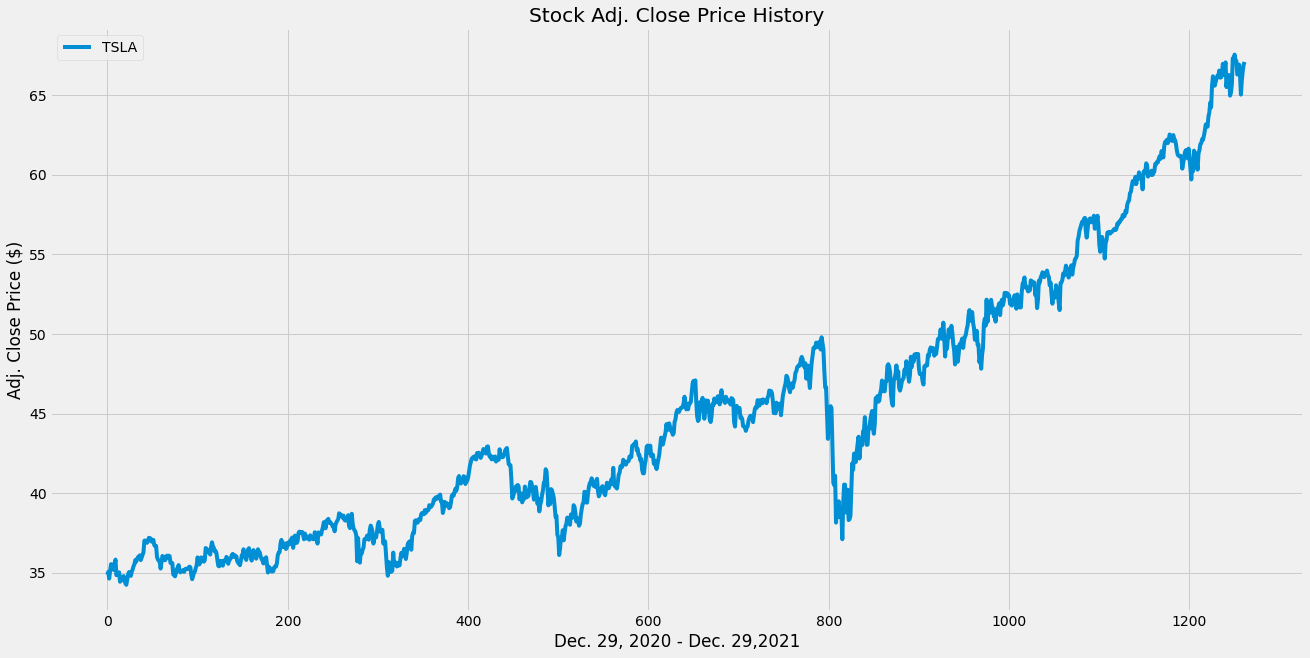

In [739]:
#Visualise the data
plt.figure(figsize=(20, 10))
plt.plot(TSLA['Adj Close'], label='TSLA')
plt.title('Stock Adj. Close Price History')
plt.xlabel('Dec. 29, 2020 - Dec. 29,2021')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show()


In [740]:
#Create simple moving average with 50 day window
SMA50 = pd.DataFrame()
SMA50['Adj. Close Price'] = TSLA['Adj Close'].rolling(window = 3).mean()
SMA50

,Adj. Close Price
0,NaN
1,NaN
2,34.863333
3,34.943334
4,35.103334
...,...
1259,65.805832
1260,66.424166
1261,66.827499
1262,NaN


In [741]:
#Create a simple moving 12 day average
SMA12 = pd.DataFrame()
SMA12_wind = 15
SMA12['Adj. Close Price'] = TSLA['Adj Close'].rolling(window=SMA12_wind).mean()
SMA12

,Adj. Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1259,66.367000
1260,66.494834
1261,66.623000
1262,NaN


In [742]:
#Create a simple moving 20 day average
SMA20 = pd.DataFrame()
SMA20_wind = 20
SMA20['Adj. Close Price'] = TSLA['Adj Close'].rolling(window=SMA20_wind).mean()
SMA20

,Adj. Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1259,66.320250
1260,66.311750
1261,66.390625
1262,NaN


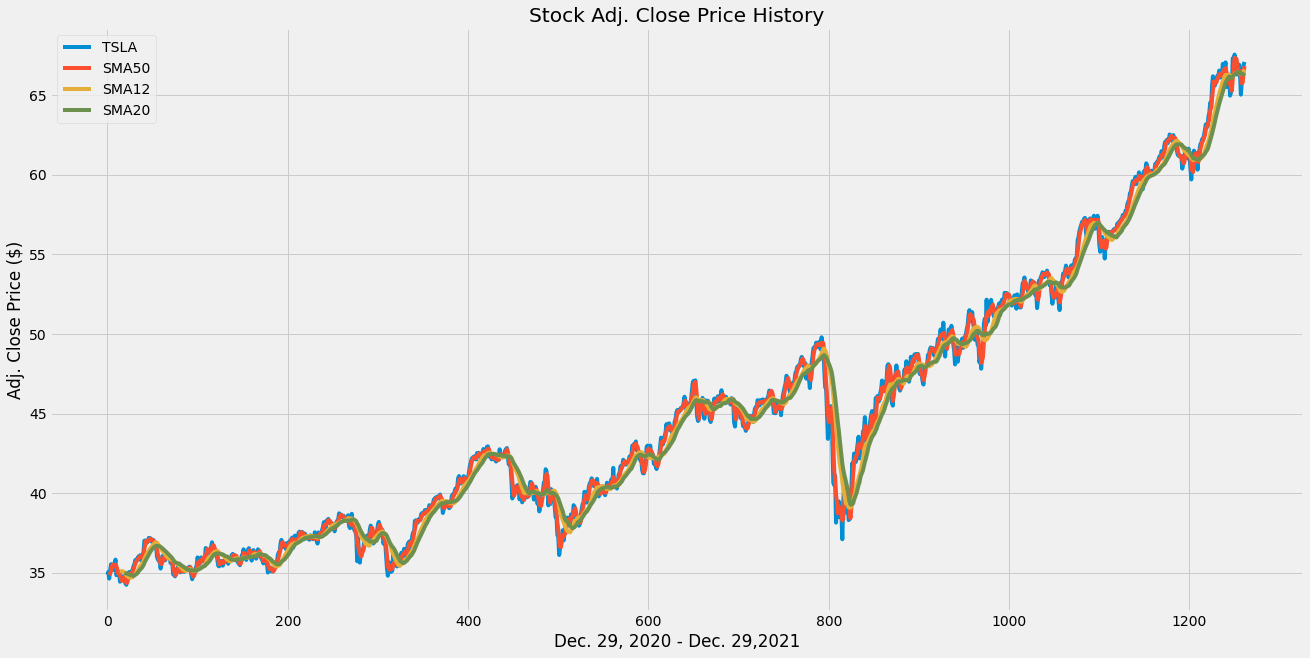

In [743]:
# Visualise the data
plt.figure(figsize=(20, 10))
plt.plot(TSLA['Adj Close'], label='TSLA')
plt.plot(SMA50['Adj. Close Price'], label='SMA50')
plt.plot(SMA12['Adj. Close Price'], label='SMA12')
plt.plot(SMA20['Adj. Close Price'], label='SMA20')
plt.title('Stock Adj. Close Price History')
plt.xlabel('Dec. 29, 2020 - Dec. 29,2021')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [744]:
#Create a new data frame to store all the data
data = pd.DataFrame()
data['TSLA'] = TSLA['Adj Close']
data['SMA50'] = SMA50['Adj. Close Price']
data['SMA20'] = SMA20['Adj. Close Price']
data['SMA12'] = SMA12['Adj. Close Price']
data

,TSLA,SMA50,SMA20,SMA12
0,34.889999,NaN,NaN,NaN
1,35.060001,NaN,NaN,NaN
2,34.639999,34.863333,NaN,NaN
3,35.130001,34.943334,NaN,NaN
4,35.540001,35.103334,NaN,NaN
...,...,...,...,...
1259,66.500000,65.805832,66.320250,66.367000
1260,66.892502,66.424166,66.311750,66.494834
1261,67.089996,66.827499,66.390625,66.623000
1262,NaN,NaN,NaN,NaN


In [745]:
#Create a function to signal when to buy and sell the asset/stock
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  #flag = 1: long position, flag = 0: short position, flag = -1: no position
  flag = -1

  for i in range(len(data)):
    if data['SMA12'][i] > data['SMA20'][i]:
      if flag != 1:
        sigPriceBuy.append(data['TSLA'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA12'][i] < data['SMA20'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['TSLA'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else: 
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

In [746]:
#Store the buy and sell data into a variable
buy_sell_data = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell_data[0]
data['Sell_Signal_Price'] = buy_sell_data[1]
data




,TSLA,SMA50,SMA20,SMA12,Buy_Signal_Price,Sell_Signal_Price
0,34.889999,NaN,NaN,NaN,NaN,NaN
1,35.060001,NaN,NaN,NaN,NaN,NaN
2,34.639999,34.863333,NaN,NaN,NaN,NaN
3,35.130001,34.943334,NaN,NaN,NaN,NaN
4,35.540001,35.103334,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1259,66.500000,65.805832,66.320250,66.367000,NaN,NaN
1260,66.892502,66.424166,66.311750,66.494834,NaN,NaN
1261,67.089996,66.827499,66.390625,66.623000,NaN,NaN
1262,NaN,NaN,NaN,NaN,NaN,NaN


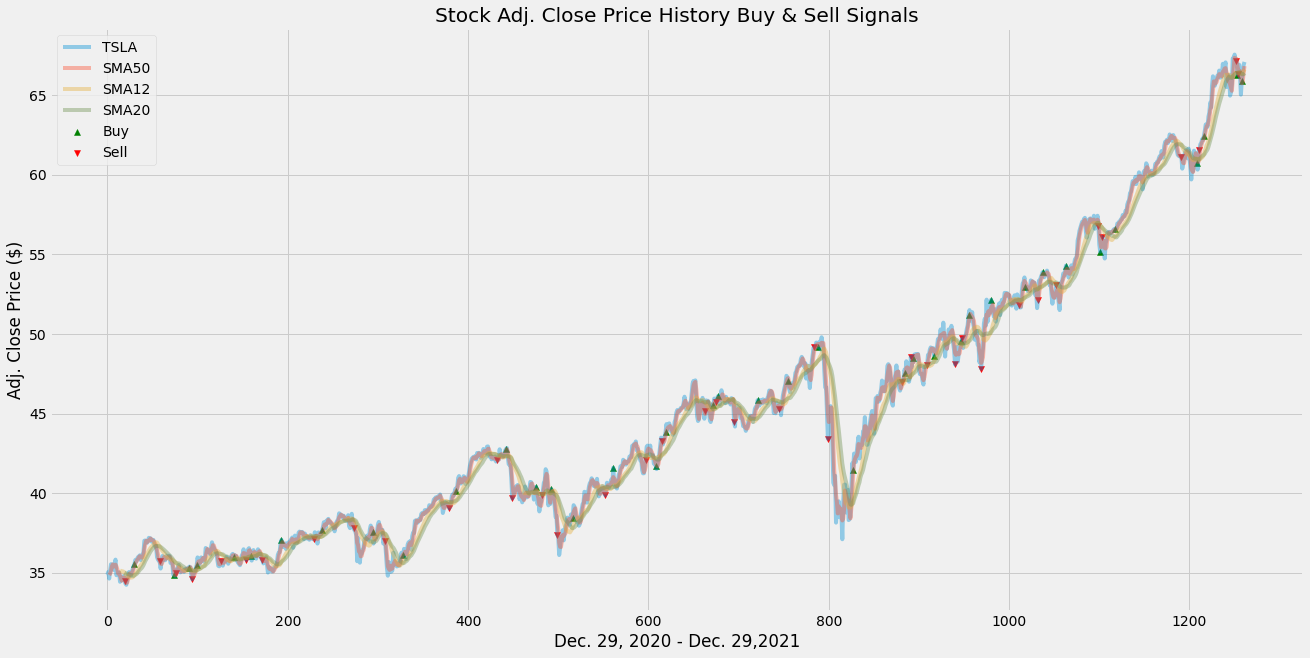

In [747]:
#Visualise the data and the strategy to buy and sell the stock
plt.figure(figsize=(20, 10))
plt.plot(data['TSLA'], label='TSLA', alpha=0.4)
plt.plot(data['SMA50'], label='SMA50', alpha=0.4)
plt.plot(data['SMA12'], label='SMA12', alpha=0.4)
plt.plot(data['SMA20'], label='SMA20', alpha=0.4)
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy', marker='^', color='green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell', marker='v', color='red')
plt.title('Stock Adj. Close Price History Buy & Sell Signals')
plt.xlabel('Dec. 29, 2020 - Dec. 29,2021')
plt.ylabel('Adj. Close Price ($)')
plt.legend(loc='upper left')
plt.show()

In [748]:
#Calculating returns

def Backtest(data):
  runningProfit = []

  flag = -1
  nan_data = data.fillna(0)
  floor = 0
  floor_next = 0
  for i in range(len(data)):
    floor = floor_next
    if flag != 1:
      if nan_data['Buy_Signal_Price'][i] != 0:
        flag = 1
        buy = data['TSLA'][i]
        profit_Percentage = 0
      else:
        profit_Percentage = 0
    if flag == 1:
      if nan_data['Sell_Signal_Price'][i] != 0:
        flag = 0
        profit_Percentage = 100*(data['TSLA'][i] / buy - 1)*(100+floor)/100
        floor_next = profit_Percentage + floor
      else:
        profit_Percentage = 100*(data['TSLA'][i] / buy - 1)*(100+floor)/100
    runningProfit.append(profit_Percentage+floor)
    
  End_Profit = runningProfit[-1]
  return runningProfit, End_Profit

Profit = Backtest(data)[0]

Simple_Profit = 100*(data['TSLA']/data['TSLA'][0]-1)




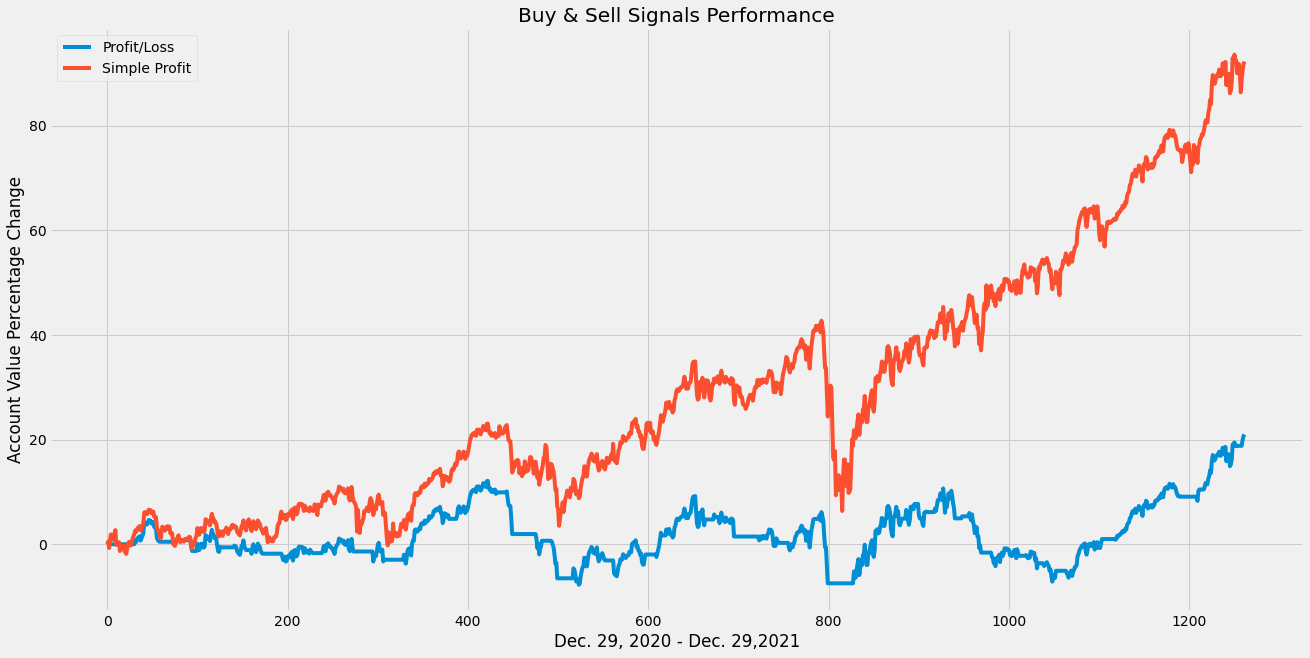

In [749]:
#Visualise the profit from the strategy
plt.figure(figsize=(20, 10))
plt.plot(data.index, Profit,  label='Profit/Loss')
plt.plot(Simple_Profit,  label='Simple Profit')
plt.title('Buy & Sell Signals Performance')
plt.xlabel('Dec. 29, 2020 - Dec. 29,2021')
plt.ylabel('Account Value Percentage Change')
plt.legend(loc='upper left')
plt.show()

In [757]:
#Optimisation
x = np.arange(2, 100, 20)
y = x
X, Y = np.meshgrid(x, y)

Z = np.zeros((len(x), len(x)))

#Finding Profit for MA Combinations
for i in range(len(x)):
  for j in range(len(y)):
    SMA12 = pd.DataFrame()
    SMA12['Adj. Close Price'] = TSLA['Adj Close'].rolling(window = X[i, j]).mean()
    SMA20 = pd.DataFrame()
    SMA20['Adj. Close Price'] = TSLA['Adj Close'].rolling(window= Y[i, j]).mean()

    data1 = pd.DataFrame()
    data1['TSLA'] = TSLA['Adj Close']
    data1['SMA20'] = SMA20['Adj. Close Price']
    data1['SMA12'] = SMA12['Adj. Close Price']

    
    buy_sell_data = buy_sell(data1)
    data1['Buy_Signal_Price'] = buy_sell_data[0]
    data1['Sell_Signal_Price'] = buy_sell_data[1]

    Total_Profit = Backtest(data1)[1]

    Z[i, j] = Total_Profit
    


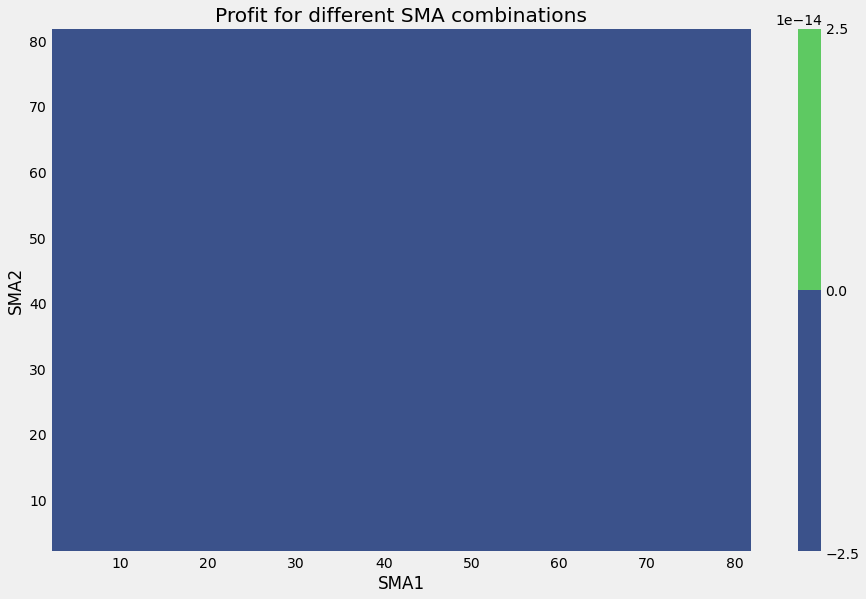

Defual Profit = 92.29722247914083


In [756]:
#Visualise all combination results

 
default_profit = Simple_Profit.iloc[-1]
a = Z < default_profit

# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes()

# Creating plot
contourf_ = ax.contourf(X, Y, Z)
ax.set_title('Profit for different SMA combinations')
ax.set_xlabel('SMA1')
ax.set_ylabel('SMA2')
cbar = fig.colorbar(contourf_)
 
# show plot
plt.show()

print('Defual Profit = {}'.format(default_profit))



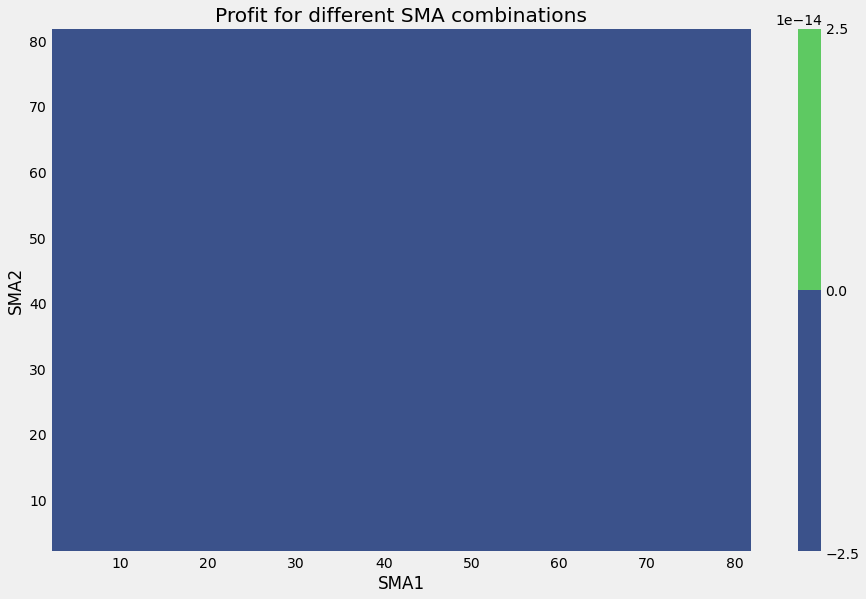

In [755]:
#Visualising Methods creating Alpha
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes()

Z[a] = 0
# Creating plot
contourf_ = ax.contourf(X, Y, Z)
ax.set_title('Profit for different SMA combinations')
ax.set_xlabel('SMA1')
ax.set_ylabel('SMA2')
cbar = fig.colorbar(contourf_)
 
# show plot
plt.show()